## Tarea 9 del curso CM-072

* Nombre y apellidos:
* Fecha de presentación: 5 de diciembre.

Código necesario para el laboratorio.

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline


def dib_svc(svc, X, y, h=0.02, pad=0.25):
    x_min, x_max = X[:, 0].min()-pad, X[:, 0].max()+pad
    y_min, y_max = X[:, 1].min()-pad, X[:, 1].max()+pad
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.2)

    plt.scatter(X[:,0], X[:,1], s=70, c=y, cmap=mpl.cm.Paired)
    # vectores de soporte indicados en la figura por lines verticales 
    sv = svc.support_vectors_
    plt.scatter(sv[:,0], sv[:,1], c='k', marker='x', s=100, linewidths='1')
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.show()
    print('Numero de vectores de soporte: ', svc.support_.size)

En esta práctica de laboratorio, usaremos el módulo $\texttt{SVC}$ del paquete $\texttt{sklearn.svm}$ para demostrar el clasificador de vectores de soporte y el SVM:

In [2]:
from sklearn.svm import SVC

La función $\texttt{SVC()} $ se puede usar para ajustar un clasificador de vectores de soporte cuando se usa el argumento $ \texttt{kernel = "linear"}$. El argumento $\texttt{c} $ nos permite especificar el costo de una infracción al margen. Cuando el argumento $\texttt{c}$ es **pequeño**, entonces los márgenes serán amplios y muchos vectores de soporte estarán en el margen o realizarán una infracción al margen. Cuando el argumento $\texttt{c} $ es grande, los márgenes serán estrechos y habrá pocos vectores de soporte en el margen o infringiendo el margen.

Podemos usar la función $\texttt{SVC()} $ para ajustar el clasificador de vectores de soporte para un valor dado del parámetro $\texttt{cost}$. Aquí demostramos el uso de esta función en un ejemplo bidimensional para poder dibujar el límite de decisión resultante. Empecemos generando un conjunto de observaciones, que pertenecen a dos clases:

In [3]:
# Generamos datos aleatorios : 20 observaciones de  2 caracteristicas y lo dividimos en dos clases
np.random.seed(5)
X = np.random.randn(20,2)
y = np.repeat([1,-1], 10)

X[y == -1] = X[y == -1]+1

Vamos a dibujar los datos para ver si las clases son linealmente separables:

Text(0,0.5,'X2')

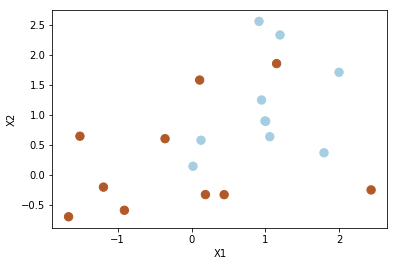

In [4]:
plt.scatter(X[:,0], X[:,1], s=70, c=y, cmap=mpl.cm.Paired)
plt.xlabel('X1')
plt.ylabel('X2')

Ajustamos el clasificador de vectores de soporte:


In [5]:
svc = SVC(C=1, kernel='linear')
svc.fit(X, y)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

Ahora podemos dibujar el clasificador de vectores de soporte llamando a la función $\texttt{𝚙𝚕𝚘𝚝⎯𝚜𝚟𝚌()}$ en la salida de la llamada a $\texttt{𝚂𝚅𝙲()}$, así como a los datos utilizados en la llamada a $\texttt{SVC()}$:

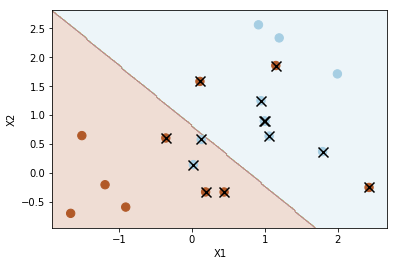

Numero de vectores de soporte:  13


In [6]:
dib_svc(svc, X, y)

La región del espacio de características que se asignará a la clase −1 se muestra en azul claro, y la región que se asignará a la clase +1 se muestra en marrón. El límite de decisión entre las dos clases es lineal (porque usamos el argumento kernel = "linear").

Los vectores de soporte se dibujan con cruces y las observaciones restantes se dibujan como círculos; Vemos aquí que hay 13 vectores de soporte. 

Podemos determinar sus identidades de la siguiente manera:

In [7]:
svc.support_

array([10, 11, 13, 14, 15, 16, 17,  0,  1,  2,  4,  6,  8], dtype=int32)

¿Qué pasa si, en cambio, utilizamos un valor más pequeño del paramétro `cost`?


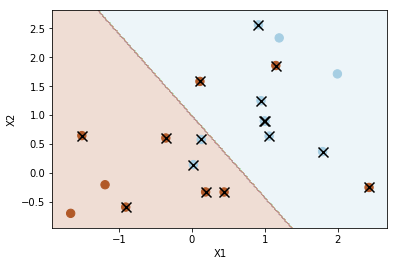

Numero de vectores de soporte:  16


In [8]:
svc2 = SVC(C=0.1, kernel='linear')
svc2.fit(X, y)
dib_svc(svc2, X, y)

Ahora que se está utilizando un valor más pequeño del parámetro `c`, obtenemos un número mayor de vectores de soporte, porque el margen ahora es más ancho.

El módulo `𝚜𝚔𝚕𝚎𝚊𝚛𝚗.𝚐𝚛𝚒𝚍⎯𝚜𝚎𝚊𝚛𝚌h` incluye una función `𝙶𝚛𝚒𝚍𝚂𝚎𝚊𝚛𝚌𝚑𝙲𝚅()`  para realizar la validación cruzada. Para utilizar esta función, pasamos información relevante sobre el conjunto de modelos que se están considerando. El siguiente comando indica que queremos realizar una validación cruzada de 10-folds para comparar las SVM con un kernel lineal, utilizando un rango de valores del parámetro de `cost`:

In [9]:
from sklearn.model_selection import GridSearchCV

# Seleccionamos el parámetro C óptimo por validación cruzada

parametros_ajustados = [{'C': [0.001, 0.01, 0.1, 1, 5, 10, 100]}]
clf = GridSearchCV(SVC(kernel='linear'), parametros_ajustados, cv=10, scoring='accuracy')
clf.fit(X, y,)

GridSearchCV(cv=10, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'C': [0.001, 0.01, 0.1, 1, 5, 10, 100]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

Podemos acceder fácilmente a los errores de validación cruzada para cada uno de estos modelos:

In [10]:
clf.cv_results_

{'mean_fit_time': array([0.00029724, 0.00026078, 0.00026746, 0.00024903, 0.00026097,
        0.00030568, 0.00039623]),
 'std_fit_time': array([8.19749542e-05, 1.80436718e-05, 2.62956995e-05, 1.48725234e-05,
        2.16297561e-05, 4.81112447e-05, 5.46128917e-05]),
 'mean_score_time': array([0.00019281, 0.00018141, 0.00018401, 0.00016768, 0.00016878,
        0.00017958, 0.00017769]),
 'std_score_time': array([2.91364770e-05, 8.86548514e-06, 1.01577507e-05, 2.80899181e-06,
        1.76576122e-05, 1.02812328e-05, 1.56014130e-05]),
 'param_C': masked_array(data=[0.001, 0.01, 0.1, 1, 5, 10, 100],
              mask=[False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 0.001},
  {'C': 0.01},
  {'C': 0.1},
  {'C': 1},
  {'C': 5},
  {'C': 10},
  {'C': 100}],
 'split0_test_score': array([0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]),
 'split1_test_score': array([0.5, 0.5, 0.5, 0. , 0. , 0. , 0. ]),
 'split2_test_score': array([0.5, 0.5, 0

La función `GridSearchCV()` almacena los mejores parámetros obtenidos, a los que se puede acceder de la siguiente manera:


In [11]:
clf.best_params_

{'C': 0.001}

`c = 0.001` es el mejor paramétro de acuerdo a `GridSearchCV`.

Como de costumbre, la función `predict()` se puede usar para predecir la etiqueta de clase en un conjunto de observaciones de prueba, en cualquier valor dado del parámetro de costo. Generemos un conjunto de datos de prueba:


In [12]:
np.random.seed(1)
X_prueba = np.random.randn(20,2)
y_prueba = np.random.choice([-1,1], 20)
X_prueba[y_prueba == 1] = X_prueba[y_prueba == 1]-1

Ahora predecimos las etiquetas de clase de estas observaciones de prueba. Aquí utilizamos el mejor modelo obtenido a través de la validación cruzada para hacer predicciones:

In [13]:
svc2 = SVC(C=0.001, kernel='linear')
svc2.fit(X, y)
y_pred = svc2.predict(X_prueba)
pd.DataFrame(confusion_matrix(y_prueba, y_pred), index=svc2.classes_, columns=svc2.classes_)

,-1,1
-1,2,6
1,0,12


Con este valor de `c`, 14 de las observaciones de prueba se clasifican correctamente.

Ahora consideramos una situación en la que las dos clases son linealmente separables. Entonces podemos encontrar un hiperplano de separación utilizando la función `svm()`. Primero, le daremos un pequeño empujón a nuestros datos simulados para que sean linealmente separables:

Text(0,0.5,'X2')

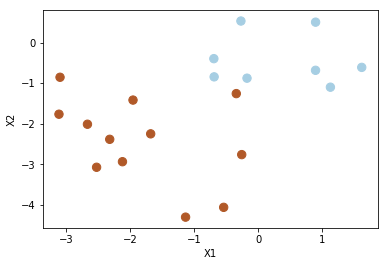

In [14]:
X_prueba[y_prueba == 1] = X_prueba[y_prueba == 1] -1
plt.scatter(X_prueba[:,0], X_prueba[:,1], s=70, c=y_prueba, cmap=mpl.cm.Paired)
plt.xlabel('X1')
plt.ylabel('X2')

Ahora las observaciones son apenas linealmente separables. Ajustamos el clasificador de vectores de soporte y dibujamos el hiperplano resultante, utilizando un valor muy grande de coste de para que no se clasifiquen erróneamente las observaciones.

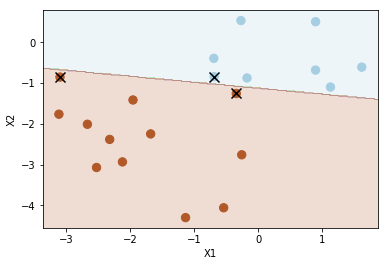

Numero de vectores de soporte:  3


In [15]:
svc3 = SVC(C=1e5, kernel='linear')
svc3.fit(X_prueba, y_prueba)
dib_svc(svc3, X_prueba, y_prueba)

No se cometieron errores de entrenamiento y solo se usaron tres vectores de soporte. Sin embargo, podemos ver en la figura que el margen es muy estrecho. Parece probable que este modelo se desempeñe mal en los datos de prueba. 

1. ¿Por que el margen es más estrecho?, ¿qué sucede si es que se utiliza un valor más pequeño a `cost`:

In [16]:
# Tu solucion

Para ajustar un SVM usando un kernel no lineal, una vez más usamos la función `SVC()`. Sin embargo, ahora usamos un valor diferente del parámetro `kernel`. Para ajustar una SVM con un kernel polinomial usamos `𝚔𝚎𝚛𝚗𝚎𝚕 = "𝚙𝚘𝚕𝚢"`  y para ajustar una SVM con un kernel radial usamos `kernel = "rbf"`. 

En el primer caso también usamos el argumento `degree` para especificar un grado para el kernel polinomial y en el último caso usamos `𝚐𝚊𝚖𝚖𝚊` para especificar un valor $\gamma$ para el kernel de base radial.

Generemos algunos datos con un límite de clase no lineal:

Text(0,0.5,'X2')

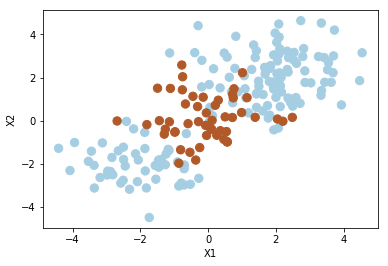

In [17]:
from sklearn.model_selection import train_test_split

np.random.seed(8)
X = np.random.randn(200,2)
X[:100] = X[:100] +2
X[101:150] = X[101:150] -2
y = np.concatenate([np.repeat(-1, 150), np.repeat(1,50)])

X_entrenamiento, X_prueba, y_entrenamiento, y_prueba = train_test_split(X, y, train_size=0.5, random_state=2)

plt.scatter(X[:,0], X[:,1], s=70, c=y, cmap=mpl.cm.Paired)
plt.xlabel('X1')
plt.ylabel('X2')

Ahora vemos cómo una clase está como atascada en medio de otra clase? Esto sugiere que podríamos querer usar un kernel radial en nuestro SVM. Ahora ajustemos los datos de entrenamiento usando la función `SVC()` con un kernel radial y $\gamma= 1$:

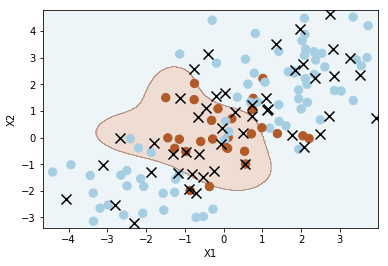

Numero de vectores de soporte:  51


In [18]:
svm = SVC(C=1.0, kernel='rbf', gamma=1)
svm.fit(X_entrenamiento, y_entrenamiento)
dib_svc(svm, X_prueba, y_prueba)

La gráfica muestra que el SVM resultante tiene un límite  no lineal. Podemos ver en la figura que hay un buen número de errores de entrenamiento en este ajuste de SVM. Si aumentamos el valor del `cost`, podemos reducir el número de errores de entrenamiento:

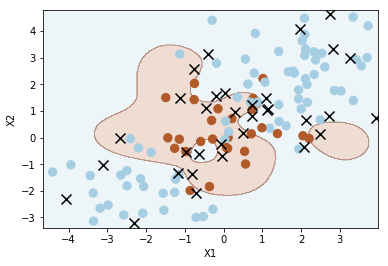

Numero de vectores de soporte:  36


In [19]:
# Incrementamos el parametro C parameter, permitiendo flexibilidad
svm2 = SVC(C=100, kernel='rbf', gamma=1.0)
svm2.fit(X_entrenamiento, y_entrenamiento)
dib_svc(svm2, X_prueba, y_prueba)

Sin embargo, esto tiene un precio de tener un límite de decisión más irregular que parece estar en riesgo de sobreajustar los datos.

Podemos realizar una validación cruzada utilizando `GridSearchCV()` para seleccionar la mejor opción de $\gamma$ y un costo de una SVM con un kernel radial:

In [20]:
parametros_ajustados = [{'C': [0.01, 0.1, 1, 10, 100],
                     'gamma': [0.5, 1,2,3,4]}]
clf = GridSearchCV(SVC(kernel='rbf'), parametros_ajustados, cv=10, scoring='accuracy')
clf.fit(X_entrenamiento, y_entrenamiento)
clf.best_params_

{'C': 1, 'gamma': 0.5}

2. Grafica el ajuste resultante utilizando la función `dib_𝚜𝚟𝚌()`  y analiza las predicciones del conjunto de pruebas para este modelo aplicando la función `predict()` en los datos de prueba. ¿ Cuál es el porcentaje de observaciones  que son correctamente clasificadas por el SVM?.


In [21]:
# Tu solucion

La función `auc` desde el paquete `sklearn.metrics` puede ser usado para producir curvas ROC.

In [22]:
from sklearn.metrics import auc
from sklearn.metrics import roc_curve

Empezamos ajustando dos modelos, uno más flexible que el otro.

In [23]:
# Modelo menos flexibles
svm3 = SVC(C=1, kernel='rbf', gamma=1)
svm3.fit(X_entrenamiento, y_entrenamiento)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [24]:
# Modelo mas flexible
svm4 = SVC(C=1, kernel='rbf', gamma=50)
svm4.fit(X_entrenamiento, y_entrenamiento)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=50, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

Es posible obtener valores ajustados para cada observación, que son los puntajes numéricos utilizados para obtener las etiquetas de clase. Por ejemplo, en el caso de un clasificador de vectores de soporte, el valor ajustado para una observación $X = (X_1, X_2, \cdots, X_p)^T$ toma la forma $\hat{\beta_0} + \hat{\beta_1}X_1 + \hat{\beta_2}X_2 +\dots + \hat{\beta_p}X_p$.

En esencia, el signo del valor ajustado determina en qué lado del límite de decisión se encuentra la observación. Por lo tanto, la relación entre el valor ajustado y la predicción de clase para una observación dada es simple: si el valor ajustado excede de cero, la observación se asigna a una clase y si es menor que cero que se asigna a la otra.

Para obtener los valores ajustados para un ajuste de modelo SVM dado, usamos el método $\texttt{decision-function()}$ del SVC:

In [25]:
y_entrenamiento_score3 = svm3.decision_function(X_entrenamiento)
y_entrenamiento_score4 = svm4.decision_function(X_entrenamiento)

Ahora podemos construir el gráfico ROC para ver cómo funcionan los modelos tanto en el entrenamiento como en los datos de prueba:

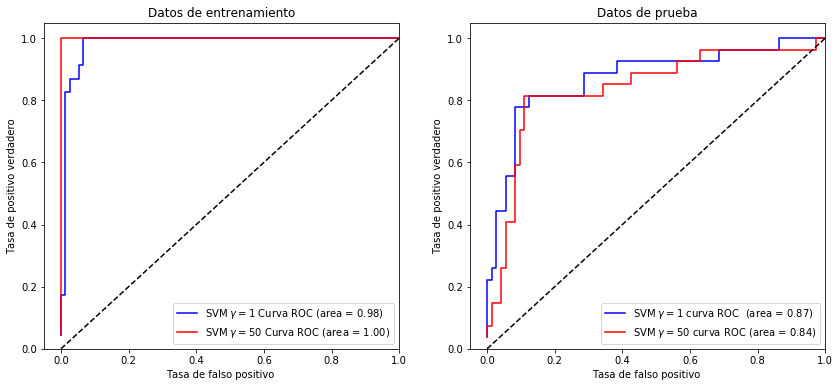

In [26]:
y_entrenamiento_score3 = svm3.decision_function(X_entrenamiento)
y_entrenamiento_score4 = svm4.decision_function(X_entrenamiento)

false_pos_rate3, true_pos_rate3, _ = roc_curve(y_entrenamiento, y_entrenamiento_score3)
roc_auc3 = auc(false_pos_rate3, true_pos_rate3)

false_pos_rate4, true_pos_rate4, _ = roc_curve(y_entrenamiento, y_entrenamiento_score4)
roc_auc4 = auc(false_pos_rate4, true_pos_rate4)

fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(14,6))
ax1.plot(false_pos_rate3, true_pos_rate3, label='SVM $\gamma = 1$ Curva ROC (area = %0.2f)' % roc_auc3, color='b')
ax1.plot(false_pos_rate4, true_pos_rate4, label='SVM $\gamma = 50$ Curva ROC (area = %0.2f)' % roc_auc4, color='r')
ax1.set_title('Datos de entrenamiento')

y_prueba_score3 = svm3.decision_function(X_prueba)
y_prueba_score4 = svm4.decision_function(X_prueba)

false_pos_rate3, true_pos_rate3, _ = roc_curve(y_prueba, y_prueba_score3)
roc_auc3 = auc(false_pos_rate3, true_pos_rate3)

false_pos_rate4, true_pos_rate4, _ = roc_curve(y_prueba, y_prueba_score4)
roc_auc4 = auc(false_pos_rate4, true_pos_rate4)

ax2.plot(false_pos_rate3, true_pos_rate3, label='SVM $\gamma = 1$ curva ROC  (area = %0.2f)' % roc_auc3, color='b')
ax2.plot(false_pos_rate4, true_pos_rate4, label='SVM $\gamma = 50$ curva ROC (area = %0.2f)' % roc_auc4, color='r')
ax2.set_title('Datos de prueba')

for ax in fig.axes:
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([-0.05, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('Tasa de falso positivo ')
    ax.set_ylabel('Tasa de positivo verdadero')
    ax.legend(loc="lower right")

3. Analiza los resultados producidos por la curva ROC

In [27]:
# Tu solucion

Si la respuesta es un factor que contiene más de dos niveles, entonces la función `svm()` realizará una clasificación de múltiples clases utilizando el enfoque `one-versus-one`. Exploramos ese entorno aquí generando una tercera clase de observaciones:

Text(0,0.5,'XX2')

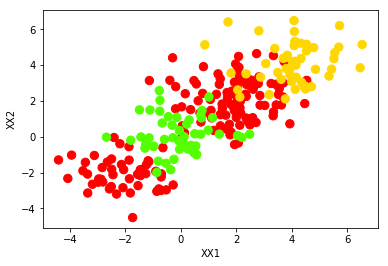

In [28]:
np.random.seed(8)
XX = np.vstack([X, np.random.randn(50,2)])
yy = np.hstack([y, np.repeat(0,50)])
XX[yy ==0] = XX[yy == 0] +4

plt.scatter(XX[:,0], XX[:,1], s=70, c=yy, cmap=plt.cm.prism)
plt.xlabel('XX1')
plt.ylabel('XX2')

Ajustamos un SVM a datos multiclase usando una sintaxis idéntica para ajustar un modelo simple de dos clases:

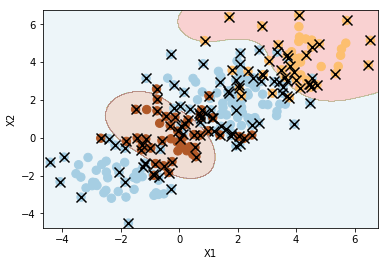

Numero de vectores de soporte:  133


In [29]:
svm5 = SVC(C=1, kernel='rbf')
svm5.fit(XX, yy)
dib_svc(svm5, XX, yy)

3. Escribe código para completar el análisis de Ahora examinamos [Optical Recognition of Handwritten Digits Data Set](http://archive.ics.uci.edu/ml/datasets/optical+recognition+of+handwritten+digits), que contiene 5,620 muestras de dígitos manuscritos `0 ..9`. Se pueden usar esos enlaces para descargar [datos de entrenamiento](http://archive.ics.uci.edu/ml/machine-learning-databases/optdigits/optdigits.tra) y [datos de prueba](http://archive.ics.uci.edu/ml/machine-learning-databases/optdigits/optdigits.tes), y luego los utilizamos  en python:

In [30]:
X_entrenamiento = pd.read_csv('optdigits.tra', header=None)
y_entrenamiento = X_entrenamiento[64]
X_entrenamiento = X_entrenamiento.drop(X_entrenamiento.columns[64], axis=1)

X_prueba = pd.read_csv('optdigits.tes', header=None)
y_prueba = X_prueba[64]
X_prueba = X_prueba.drop(X_prueba.columns[64], axis=1)

Echemos un vistazo a las dimensiones de este conjunto de datos:

In [31]:
print(X_entrenamiento.shape)
print(X_prueba.shape)

(3823, 64)
(1797, 64)


Este conjunto de datos consta de imágenes preprocesadas de muestras de escritura a mano reunidas de 43 personas diferentes. Cada imagen se convirtió en una matriz de `8x8` (`64` píxeles), que luego se aplanó en un vector de `64` valores numéricos. La columna final contiene la etiqueta de clase para cada dígito.

Los conjuntos de entrenamiento y prueba constan de `3823` y `1797` observaciones respectivamente. Veamos cómo se ve uno de estos dígitos:

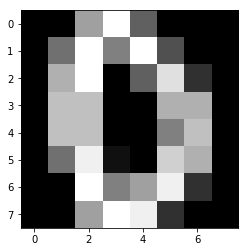

In [32]:
plt.imshow(X_entrenamiento.values[1].reshape(8,8), cmap="gray") 
plt.show()

Eso es un dígito desconocido. Echemos un vistazo a la verdadera clase:

In [33]:
y_entrenamiento[0]

0

Parece que el SVM tiene trabajo. Comencemos con un kernel lineal para ver cómo empezamos a analizar los datos:

In [34]:
svc = SVC(kernel='linear')
svc.fit(X_entrenamiento, y_entrenamiento)

# Dibujamos una matriz de confusion
cm = confusion_matrix(y_entrenamiento, svc.predict(X_entrenamiento))
cm_df = pd.DataFrame(cm.T, index=svc.classes_, columns=svc.classes_)
print(cm_df)

     0    1    2    3    4    5    6    7    8    9
0  376    0    0    0    0    0    0    0    0    0
1    0  389    0    0    0    0    0    0    0    0
2    0    0  380    0    0    0    0    0    0    0
3    0    0    0  389    0    0    0    0    0    0
4    0    0    0    0  387    0    0    0    0    0
5    0    0    0    0    0  376    0    0    0    0
6    0    0    0    0    0    0  377    0    0    0
7    0    0    0    0    0    0    0  387    0    0
8    0    0    0    0    0    0    0    0  380    0
9    0    0    0    0    0    0    0    0    0  382


Vemos que no hay errores de entrenamiento. De hecho, esto no es sorprendente, debido a que la gran cantidad de variables en relación con la cantidad de observaciones implica que es fácil encontrar hiperplanos que separen completamente las clases. Lo que más nos interesa no es el desempeño del clasificador de vectores de soporte en las observaciones de entrenamiento, sino su desempeño en las observaciones de prueba:


In [35]:
cm = confusion_matrix(y_prueba, svc.predict(X_prueba))
print(pd.DataFrame(cm.T, index=svc.classes_, columns=svc.classes_))

     0    1    2    3    4    5    6    7    8    9
0  177    0    0    1    0    0    0    0    0    1
1    0  178    7    0    0    0    0    0    9    0
2    0    0  170    5    0    1    0    0    1    0
3    0    0    0  171    0    0    0    0    5    4
4    0    0    0    0  180    0    1    1    0    1
5    1    0    0    2    0  180    0    7    2    3
6    0    3    0    0    0    0  179    0    0    0
7    0    0    0    2    0    0    0  165    0    0
8    0    1    0    1    1    0    1    0  157    1
9    0    0    0    1    0    1    0    6    0  170


Si `cost = 10` se produce solo `71` errores de conjuntos de prueba en estos datos. Ahora usa la función `GridSearchCV()` para seleccionar un valor óptimo para `c`. Considere los valores en el rango de `0.01` a `100`:


In [36]:
# Tu respuesta